# FLEE-GNN - Cross-silo data processing

## load libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## define states for each silo regions

In [2]:
region_WEST = ['AK', 'HI', 'WA', 'OR', 'CA', 'NV', 'AZ', 'NM', 'UT', 'CO', 'MT', 'ID', 'WY']
region_MIDWEST = ['ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'MN', 'WI', 'IL', 'IN', 'MI', 'OH']
region_SOUTH = ['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'WV', 'DC', 'VA', 'MD', 'DE', 'NC', 'SC', 'GA', 'FL']
region_NORTHEAST = ['PA', 'NY', 'NJ', 'CT', 'RI', 'MA', 'VT', 'NH', 'ME']

## load CFS 2012 data and get masks for filtering silo data

In [ ]:
cfs_2012 = pd.read_csv('data/2012_data.csv')

In [ ]:
# option 1 - for silo data, we only include flows whose both origins and destinations are located inside of the silo
region_WEST_mask = cfs_2012['Origin'].isin(region_WEST) & cfs_2012['Destination'].isin(region_WEST)
region_MIDWEST_mask = cfs_2012['Origin'].isin(region_MIDWEST) & cfs_2012['Destination'].isin(region_MIDWEST)
region_SOUTH_mask = cfs_2012['Origin'].isin(region_SOUTH) & cfs_2012['Destination'].isin(region_SOUTH)
region_NORTHEAST_mask = cfs_2012['Origin'].isin(region_NORTHEAST) & cfs_2012['Destination'].isin(region_NORTHEAST)

In [3]:
# option 2 - for silo data, we include flows whose either origins or destinations are located inside of the silo
# region_WEST_mask = cfs_2012['Origin'].isin(region_WEST) | cfs_2012['Destination'].isin(region_WEST)
# region_MIDWEST_mask = cfs_2012['Origin'].isin(region_MIDWEST) | cfs_2012['Destination'].isin(region_MIDWEST)
# region_SOUTH_mask = cfs_2012['Origin'].isin(region_SOUTH) | cfs_2012['Destination'].isin(region_SOUTH)
# region_NORTHEAST_mask = cfs_2012['Origin'].isin(region_NORTHEAST) | cfs_2012['Destination'].isin(region_NORTHEAST)

In [ ]:
sum(region_WEST_mask), sum(region_MIDWEST_mask), sum(region_SOUTH_mask), sum(region_NORTHEAST_mask)

## generate silo data from whole data

In [ ]:
cfs_2012[region_WEST_mask].reset_index().drop(columns = ['index']).to_csv('data/2012_data_region_WEST.csv', index=False)
cfs_2012[region_MIDWEST_mask].reset_index().drop(columns = ['index']).to_csv('data/2012_data_region_MIDWEST.csv', index=False)
cfs_2012[region_SOUTH_mask].reset_index().drop(columns = ['index']).to_csv('data/2012_data_region_SOUTH.csv', index=False)
cfs_2012[region_NORTHEAST_mask].reset_index().drop(columns = ['index']).to_csv('data/2012_data_region_NORTHEAST.csv', index=False)

## generate graph data from real data with noise level of 0.2

In [ ]:
! python ./scripts/generate_data_from_real_data.py --data-path ./data/2012_data_region_WEST.csv --save-dir ./training/noise_data_region_WEST_v2_0.2/ --size 100 --noise-rate 0.2
! python ./scripts/generate_data_from_real_data.py --data-path ./data/2012_data_region_MIDWEST.csv --save-dir ./training/noise_data_region_MIDWEST_v2_0.2/ --size 100 --noise-rate 0.2
! python ./scripts/generate_data_from_real_data.py --data-path ./data/2012_data_region_SOUTH.csv --save-dir ./training/noise_data_region_SOUTH_v2_0.2/ --size 100 --noise-rate 0.2
! python ./scripts/generate_data_from_real_data.py --data-path ./data/2012_data_region_NORTHEAST.csv --save-dir ./training/noise_data_region_NORTHEAST_v2_0.2/ --size 100 --noise-rate 0.2

## generate label for generated graph data

In [ ]:
! python ./scripts/generate_label.py --info-dir ./data/info --data-dir ./training/noise_data_region_WEST_v2_0.2/ --label-dir ./training/noise_data_region_WEST_v2_0.2/ --size 100
! python ./scripts/generate_label.py --info-dir ./data/info --data-dir ./training/noise_data_region_MIDWEST_v2_0.2/ --label-dir ./training/noise_data_region_MIDWEST_v2_0.2/ --size 100
! python ./scripts/generate_label.py --info-dir ./data/info --data-dir ./training/noise_data_region_SOUTH_v2_0.2/ --label-dir ./training/noise_data_region_SOUTH_v2_0.2/ --size 100
! python ./scripts/generate_label.py --info-dir ./data/info --data-dir ./training/noise_data_region_NORTHEAST_v2_0.2/ --label-dir ./training/noise_data_region_NORTHEAST_v2_0.2/ --size 100

## visualization

In [2]:
data_2012_region_WEST = pd.read_csv('./data/2012_data_region_WEST.csv')
data_2012_region_SOUTH = pd.read_csv('./data/2012_data_region_SOUTH.csv')
data_2012_region_MIDWEST = pd.read_csv('./data/2012_data_region_MIDWEST.csv')
data_2012_region_NORTHEAST = pd.read_csv('./data/2012_data_region_NORTHEAST.csv')

In [3]:
# Load dataframe to create graph
data_2012_region_WEST_G = nx.from_pandas_edgelist(source = 'Origin', target = 'Destination', df = data_2012_region_WEST, edge_attr=True, create_using=nx.MultiDiGraph())
data_2012_region_SOUTH_G = nx.from_pandas_edgelist(source = 'Origin', target = 'Destination', df = data_2012_region_SOUTH, edge_attr=True, create_using=nx.MultiDiGraph())
data_2012_region_MIDWEST_G = nx.from_pandas_edgelist(source = 'Origin', target = 'Destination', df = data_2012_region_MIDWEST, edge_attr=True, create_using=nx.MultiDiGraph())
data_2012_region_NORTHEAST_G = nx.from_pandas_edgelist(source = 'Origin', target = 'Destination', df = data_2012_region_NORTHEAST, edge_attr=True, create_using=nx.MultiDiGraph())

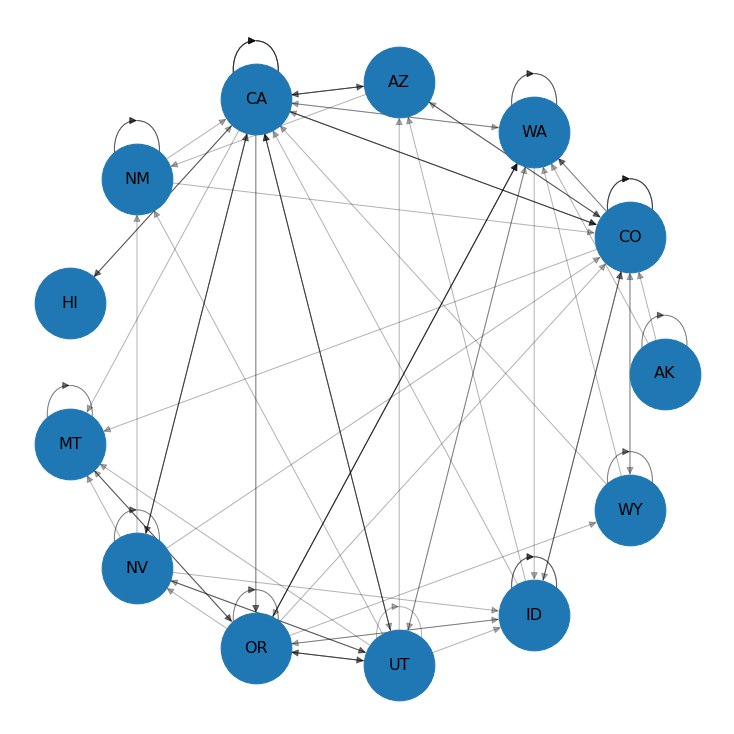

In [4]:
# Visualization
plt.figure(figsize=(10,10))
# draw_circular draw_kamada_kawai
nx.draw_circular(data_2012_region_WEST_G, with_labels=True, node_size=5000, font_size=16, edge_color=(0,0,0,0.3), arrowsize=15)
plt.show()

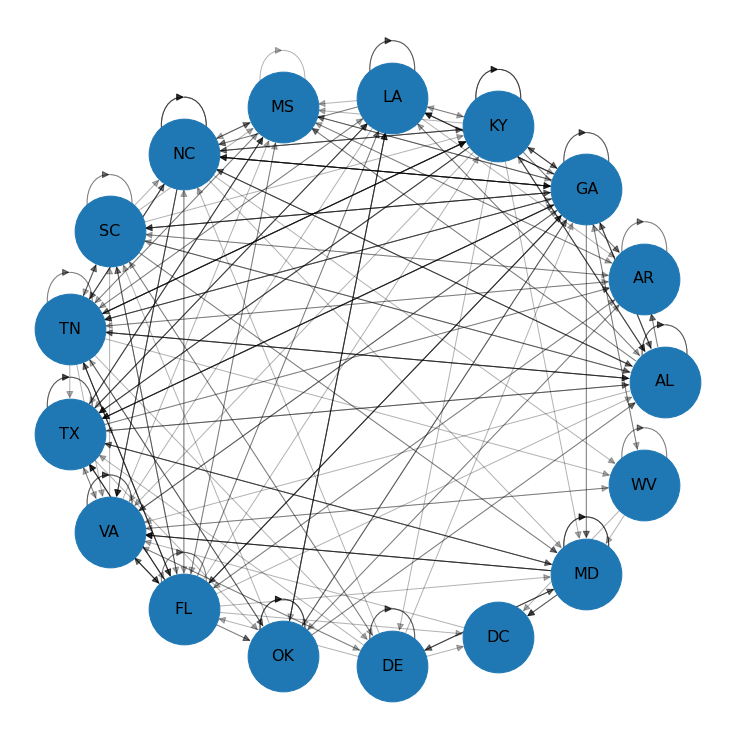

In [5]:
# Visualization
plt.figure(figsize=(10,10))
# draw_circular draw_kamada_kawai
nx.draw_circular(data_2012_region_SOUTH_G, with_labels=True, node_size=5000, font_size=16, edge_color=(0,0,0,0.3), arrowsize=15)
plt.show()

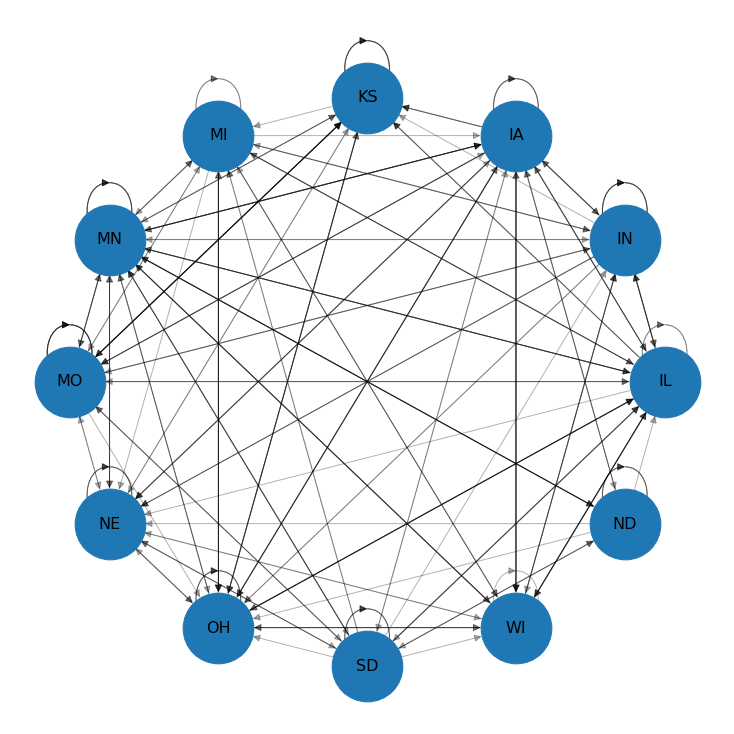

In [6]:
# Visualization
plt.figure(figsize=(10,10))
# draw_circular draw_kamada_kawai
nx.draw_circular(data_2012_region_MIDWEST_G, with_labels=True, node_size=5000, font_size=16, edge_color=(0,0,0,0.3), arrowsize=15)
plt.show()

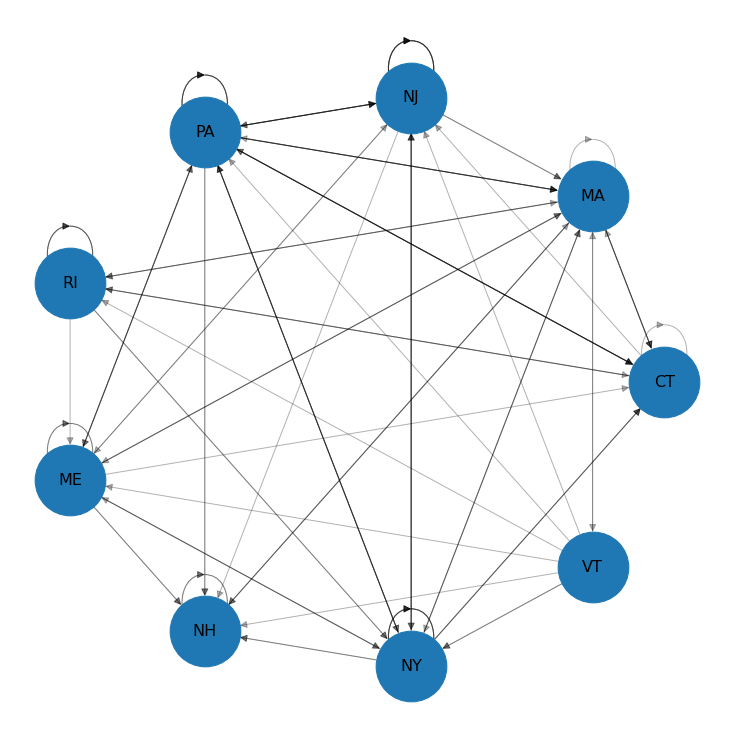

In [7]:
# Visualization
plt.figure(figsize=(10,10))
# draw_circular draw_kamada_kawai
nx.draw_circular(data_2012_region_NORTHEAST_G, with_labels=True, node_size=5000, font_size=16, edge_color=(0,0,0,0.3), arrowsize=15)
plt.show()